# **Introduction**
----------------

### Le but de ce projet est de créer un modèle de classification supervisée, permettant, à partir d'un jeu de données d'une compagnie d'assurance de classer des données. 
Ces données prennent la forme de profils clients, ces profils comprennent de nombreuses informations comme par exemple l'âge, le genre ou le credit score de l'assuré. La donnée importante pour la création de notre modèle et la connaissance de si, oui ou non, l'assuré à fait une demande d'indemnisation, cela pourra permettre à cette compagnie d'assurance de prévoir à l'avance selon le profil de nouveau clients, si ils feront une nouvelle demande. 



## PARTIE 1 Importation et lecture des données
Ce premier bout de code permet de récupérer et lire les données depuis notre fichier CSV afin d'avoir une première analyse superficielle, ce faisant, nous pouvons vérifier la forme que prennent ces dites données. Ainsi nous pouvons préciser l'objectif du problème, il faut analyser les données pour prédire la demande d'indemnisation 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()



first_rows, info, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

(       id  age  gender driving_experience    education         income  \
 0  569520    3       0               0-9y  high school    upper class   
 1  750365    0       1               0-9y         none        poverty   
 2  199901    0       0               0-9y  high school  working class   
 3  478866    0       1               0-9y   university  working class   
 4  731664    1       1             10-19y         none  working class   
 
    credit_score  vehicle_ownership vehicle_year  married  children  \
 0      0.629027                1.0   after 2015      0.0       1.0   
 1      0.357757                0.0  before 2015      0.0       0.0   
 2      0.493146                1.0  before 2015      0.0       0.0   
 3      0.206013                1.0  before 2015      0.0       1.0   
 4      0.388366                1.0  before 2015      0.0       0.0   
 
    postal_code  annual_mileage vehicle_type  speeding_violations  duis  \
 0        10238         12000.0        sedan       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

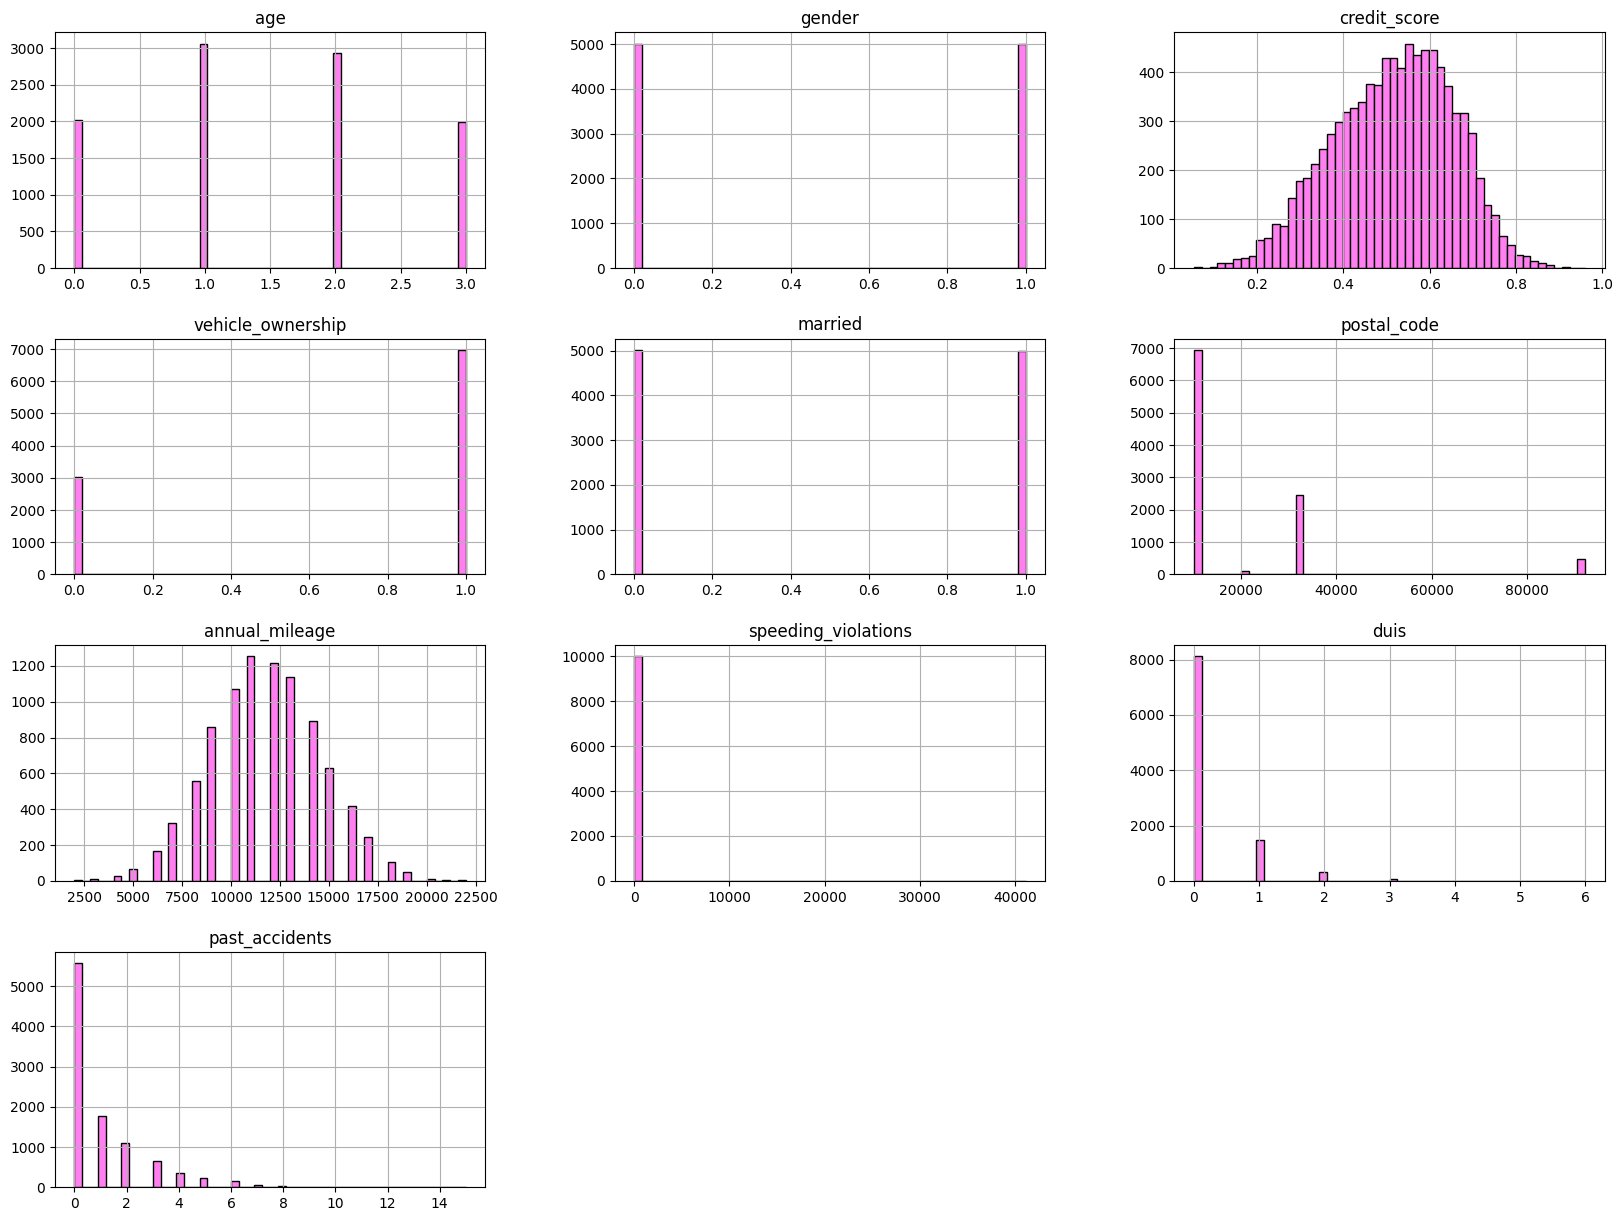

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()

# Détection des valeurs manquantes
missing_values = data.isna().sum()

# Visualisation des distributions des variables numériques
data = data.drop(columns=['id'])
data = data.drop(columns=['outcome'])
data = data.drop(columns=['children'])
data.hist(bins=50, figsize=(20, 15), color='#ff7f00', ec='black')
plt.show()

first_rows, info, description, missing_values

print(missing_values)
